# The latest Keras.io Code Examples Analysis 1 - Timeline

The Keras.io Code Example is frequently updated. To track the latest information, this code checks when the example was added or changed. 

## Download Keras.io Code Example

This shell downloads all keras repository from github.

In [68]:
# download keras-io source code

!wget --no-check-certificate https://github.com/keras-team/keras-io/archive/refs/heads/master.zip

--2022-02-25 05:08:46--  https://github.com/keras-team/keras-io/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/keras-team/keras-io/zip/refs/heads/master [following]
--2022-02-25 05:08:46--  https://codeload.github.com/keras-team/keras-io/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.121.10
Connecting to codeload.github.com (codeload.github.com)|140.82.121.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.1’

master.zip.1            [        <=>         ] 121.75M  22.7MB/s    in 5.7s    

2022-02-25 05:08:53 (21.2 MB/s) - ‘master.zip.1’ saved [127669641]



In [69]:
# unzip keras-io source code

import os
import zipfile

zf = zipfile.ZipFile('master.zip', 'r')
zf.extractall('keras-io')
examples_path = 'keras-io/keras-io-master/examples/'

In [70]:
# ref: https://wikidocs.net/39

def search(dir_path, list_file_path, list_dir_path, dir_path_depth):

    try:
        filenames = os.listdir(dir_path)
        for filename in filenames:
            full_filename = os.path.join(dir_path, filename)
            if os.path.isdir(full_filename):
                search(full_filename, list_file_path, list_dir_path, dir_path_depth)
                if full_filename.count('/') == dir_path_depth:
                    list_dir_path.append(full_filename.split('/')[3])
            else:
                ext = os.path.splitext(full_filename)[-1]
                if ext == '.py': 
                    list_file_path.append(full_filename)
    except PermissionError:
        pass

py_files = []
catagories_path = []
search(examples_path, py_files, catagories_path, 3)

print(py_files)
print(catagories_path)

['keras-io/keras-io-master/examples/rl/deep_q_network_breakout.py', 'keras-io/keras-io-master/examples/rl/actor_critic_cartpole.py', 'keras-io/keras-io-master/examples/rl/ddpg_pendulum.py', 'keras-io/keras-io-master/examples/rl/ppo_cartpole.py', 'keras-io/keras-io-master/examples/keras_recipes/subclassing_conv_layers.py', 'keras-io/keras-io-master/examples/keras_recipes/tensorflow_numpy_models.py', 'keras-io/keras-io-master/examples/keras_recipes/memory_efficient_embeddings.py', 'keras-io/keras-io-master/examples/keras_recipes/creating_tfrecords.py', 'keras-io/keras-io-master/examples/keras_recipes/quasi_svm.py', 'keras-io/keras-io-master/examples/keras_recipes/antirectifier.py', 'keras-io/keras-io-master/examples/keras_recipes/bayesian_neural_networks.py', 'keras-io/keras-io-master/examples/keras_recipes/endpoint_layer_pattern.py', 'keras-io/keras-io-master/examples/keras_recipes/tfrecord.py', 'keras-io/keras-io-master/examples/keras_recipes/sample_size_estimate.py', 'keras-io/keras-i

## Get meta information of each code example

This shell gets meta information from the first cell of each source code using parsing.

For example:

```
"""
Title: Image classification from scratch
Author: [fchollet](https://twitter.com/fchollet)
Date created: 2020/04/27
Last modified: 2020/04/28
Description: Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.
"""
```

In [71]:
from collections import defaultdict
import pandas as pd

def get_meta(source_code_file):
    meta_dict = {}
    fp = open(source_code_file, 'rt')
    check = 0
    while True:
        line = fp.readline()
        if line == '"""\n':
            if check == 0:
                check = 1
                continue
            elif check == 1:
                break;
        if not line: 
            break
        tokens = line.split(':',1)
        meta_dict[tokens[0]] = tokens[1].lstrip().rstrip('\n')
    fp.close()
    return meta_dict

meta_dict_list = {'Filename' : [], 
                  'Category' : [], 
                  'Title' : [],
                  'Author' : [],
                  'Date created' : [],
                  'Last modified' : [],
                  'Description' : [],
                  'Authors' : []}

for py_file in py_files:
    meta_dict = get_meta(py_file)

    meta_dict_list['Filename'].append(py_file)
    meta_dict_list['Category'].append(py_file.split('/')[3])

    for key in meta_dict_list.keys():
        if key == 'Filename' or key == 'Category':
            continue
        try:  
            value = meta_dict[key]
            meta_dict_list[key].append(value)
        except KeyError:
            meta_dict_list[key].append('')

## Generate a dataframe from meta

This shell generates a dataframe from the meta dictionary.

In [72]:
# genrate dataframe from meta_dict

meta_df = pd.DataFrame(meta_dict_list)

meta_df['Date created'] = pd.to_datetime(meta_df['Date created'])
meta_df['Last modified'] = pd.to_datetime(meta_df['Last modified'])
meta_df['Link'] = meta_df['Filename'].str.replace('keras-io/keras-io-master/examples/', 'https://keras.io/examples/').str.replace('.py', '')
meta_df['Title'] = "<a href=" + meta_df['Link'] + ">" + meta_df['Title'] + "</a>"

report_df = meta_df[['Category', 'Title', 'Date created', 'Last modified']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


## Generate a plot accumulated count of code example by field

This shell generates a plot accumulated count of code example by field.

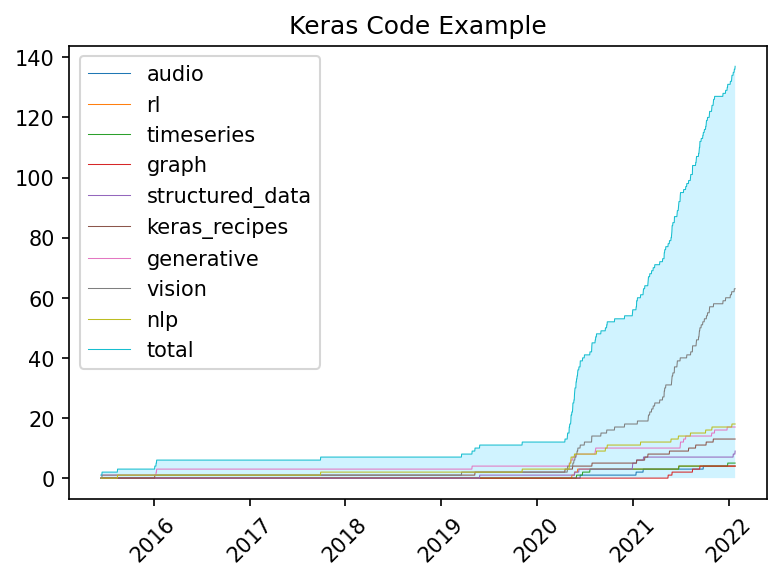

In [73]:
import IPython
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import matplotlib.colors as mcolors
import numpy as np

def plot_accumulated_count(title, dates, categories):

    # Get some auxilliary values
    min_date = date2num(dates[0])
    max_date = date2num(dates[-1])
    days = int(max_date - min_date + 1)

    categories_key = list(set(categories))
    categories_key.append('total')

    # Initialize X and Y axes
    x = np.arange(min_date, max_date + 1)
    y = np.zeros((len(categories_key), days))
    y_sum = np.zeros((len(categories_key), days))

    # Iterate over dates, increase registration array
    for i, date in enumerate(dates):
        date_index = int(date2num(date) - min_date)
        category_index = categories_key.index(categories[i])
        y[category_index, date_index] += 1
        y[-1, date_index] += 1 # total

    for i, value in enumerate(categories_key):
        y_sum[i] = np.cumsum(y[i])

    color_list = list(mcolors.TABLEAU_COLORS.items())

    # Plot
    plt.figure(dpi=150)

    for i, value in enumerate(categories_key):
        plt.plot_date(x, y_sum[i], xdate=True, ydate=False, ls='-', ms=-1, linewidth=0.5, color=color_list[i][1], label = value)    

    plt.fill_between(x, 0, y_sum[-1], facecolor='#D0F3FF')
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.title(title)
    plt.show()

# date plot
sorted_report_df = report_df.sort_values(by=['Date created'], ascending=True)
dates = pd.to_datetime(sorted_report_df['Date created']).tolist()
categories = sorted_report_df['Category'].tolist()
plot_accumulated_count('Keras Code Example', dates, categories)

## Render a HTML from data frame sorted by date

This shell renders HTML from the data frame sorted by date.

In [74]:
# sorted by 'Date created'

sorted_report_df = report_df.sort_values(by=['Date created'], ascending=False)
rendering_html = sorted_report_df.to_html(render_links=True, escape=False, index=False)
IPython.display.HTML(rendering_html)

Category,Title,Date created,Last modified
structured_data,Classification with TensorFlow Decision Forests,2022-01-25,2022-01-25
vision,Augmenting convnets with aggregated attention,2022-01-22,2022-01-22
structured_data,Structured data learning with TabTransformer,2022-01-18,2022-01-18
nlp,Question Answering with Hugging Face Transformers,2022-01-13,2022-01-13
vision,Video Vision Transformer,2022-01-12,2022-01-12
vision,Train a Vision Transformer on small datasets,2022-01-07,2022-01-10
timeseries,Traffic forecasting using graph neural networks and LSTM,2021-12-28,2021-12-28
generative,GauGAN for conditional image generation,2021-12-26,2022-01-03
vision,Masked image modeling with Autoencoders,2021-12-20,2021-12-21
vision,Learning to tokenize in Vision Transformers,2021-12-10,2021-12-15


In [75]:
# sorted by 'Last modified'

sorted_report_df = report_df.sort_values(by=['Last modified'], ascending=False)
rendering_html = sorted_report_df.to_html(render_links=True, escape=False, index=False)
IPython.display.HTML(rendering_html)

Category,Title,Date created,Last modified
structured_data,Classification with TensorFlow Decision Forests,2022-01-25,2022-01-25
vision,Augmenting convnets with aggregated attention,2022-01-22,2022-01-22
structured_data,Structured data learning with TabTransformer,2022-01-18,2022-01-18
nlp,Question Answering with Hugging Face Transformers,2022-01-13,2022-01-13
vision,Video Vision Transformer,2022-01-12,2022-01-12
vision,Train a Vision Transformer on small datasets,2022-01-07,2022-01-10
generative,GauGAN for conditional image generation,2021-12-26,2022-01-03
timeseries,Traffic forecasting using graph neural networks and LSTM,2021-12-28,2021-12-28
graph,Message-passing neural network (MPNN) for molecular property prediction,2021-08-16,2021-12-27
graph,Graph attention network (GAT) for node classification,2021-09-13,2021-12-26


In [76]:
# sorted by 'Category' and 'Date created'

sorted_report_df = report_df.sort_values(by=['Category', 'Date created'], ascending=False)
rendering_html = sorted_report_df.to_html(render_links=True, escape=False, index=False)
IPython.display.HTML(rendering_html)

Category,Title,Date created,Last modified
vision,Augmenting convnets with aggregated attention,2022-01-22,2022-01-22
vision,Video Vision Transformer,2022-01-12,2022-01-12
vision,Train a Vision Transformer on small datasets,2022-01-07,2022-01-10
vision,Masked image modeling with Autoencoders,2021-12-20,2021-12-21
vision,Learning to tokenize in Vision Transformers,2021-12-10,2021-12-15
vision,Barlow Twins for Contrastive SSL,2021-11-04,2021-12-20
vision,MobileViT: A mobile-friendly Transformer-based model for image classification,2021-10-20,2021-10-20
vision,Image classification with EANet (External Attention Transformer),2021-10-19,2021-10-19
vision,Image classification with ConvMixer,2021-10-12,2021-10-12
vision,FixRes: Fixing train-test resolution discrepancy,2021-10-08,2021-10-10


In [77]:
# sorted by 'Category' and 'Last modified'

sorted_report_df = report_df.sort_values(by=['Category', 'Last modified'], ascending=False)
rendering_html = sorted_report_df.to_html(render_links=True, escape=False, index=False)
IPython.display.HTML(rendering_html)

Category,Title,Date created,Last modified
vision,Augmenting convnets with aggregated attention,2022-01-22,2022-01-22
vision,Video Vision Transformer,2022-01-12,2022-01-12
vision,Train a Vision Transformer on small datasets,2022-01-07,2022-01-10
vision,Masked image modeling with Autoencoders,2021-12-20,2021-12-21
vision,Barlow Twins for Contrastive SSL,2021-11-04,2021-12-20
vision,Learning to tokenize in Vision Transformers,2021-12-10,2021-12-15
vision,Classification using Attention-based Deep Multiple Instance Learning (MIL).,2021-08-16,2021-11-25
vision,Image Captioning,2021-05-29,2021-10-31
vision,MobileViT: A mobile-friendly Transformer-based model for image classification,2021-10-20,2021-10-20
vision,Image classification with EANet (External Attention Transformer),2021-10-19,2021-10-19
